In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('housing.csv')

In [13]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [15]:
df['Address'].nunique()

5000

In [16]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [22]:
target=df['Price']


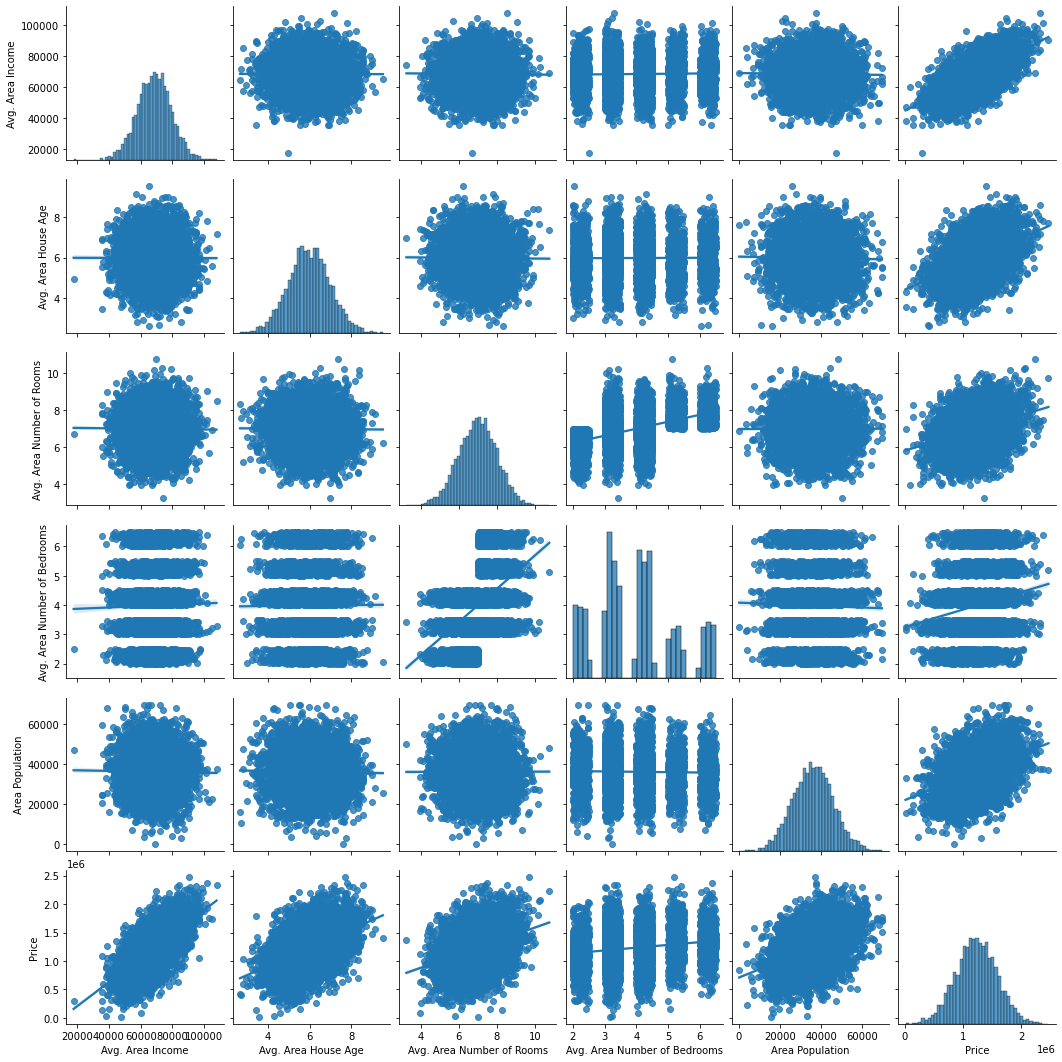

In [19]:
sns.pairplot(data=df,kind='reg')

<AxesSubplot:>

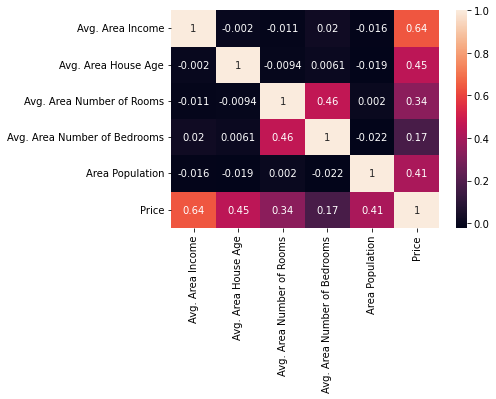

In [17]:
sns.heatmap(df.corr(),annot=True)

In [44]:
target=df['Price']
features=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population'
]]


In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.25,random_state=101)


In [46]:
xtrain.shape

(3750, 4)

In [47]:
ytest.shape

(1250,)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain , ytrain)

LinearRegression()

In [49]:
model

LinearRegression()

In [50]:
model.score(xtest,ytest)*100

91.70576659270534

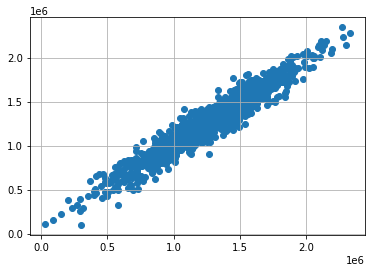

In [51]:
ypreed_test=model.predict(xtest)
plt.scatter(ytest,ypreed_test)
plt.grid()

In [55]:
query_data={'Avg. Area Income':[200000], 'Avg. Area House Age':[6],'Avg. Area Number of Rooms':[5],'Area Population':[30000]}
result=model.predict(pd.DataFrame(query_data))

In [52]:
xtrain.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population'],
      dtype='object')

In [57]:
print(result[0])

3743363.8242754387


In [58]:
pd.to_pickle(model,'HousePrice.pickle')